<a href="https://colab.research.google.com/github/ShashankKamath/AutoML/blob/master/CNNwithDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/autoML')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torchvision

In [0]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [0]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:03, 3007791.06it/s]                             


Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 67737.69it/s]                            
0it [00:00, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1043305.52it/s]                            
0it [00:00, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 26111.53it/s]            

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1000, 1, 28, 28])

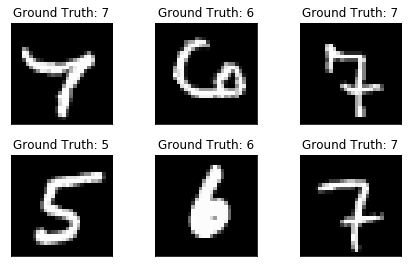

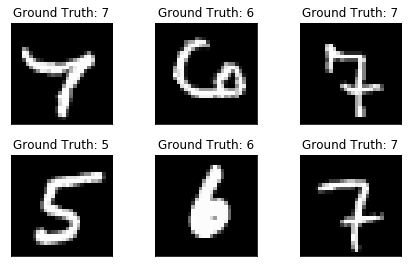

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

Building the Network

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchsummary  import summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Padding: ((n+2p-f)/s)+1 x((n+2p-f)/s)+1
p= (f-1)/2 for output size to be same as input size


CNN Number of layers change with padding working


In [0]:
# class CNNtry(nn.Module):
#     fc_unit=0
#     def __init__(self,numLayers,fc_unit):
#         super(CNNtry, self).__init__()
#         self.layers = nn.ModuleList()
#         self.layers.append(nn.Conv2d(1, 5, kernel_size=3,padding=0))
# #         try:
#         for i in range(numLayers - 2):
#           self.layers.append(nn.Conv2d(in_channels=5, out_channels=5, kernel_size=3,padding=0))  
#         self.layers.append(nn.Conv2d(5, 1, kernel_size=3,padding=0))
#         self.layers.append(nn.Linear(fc_unit,50))
#         self.layers.append(nn.Linear(50,10))
#         print(self)
hi
#     def forward(self, x):
#       y = x
# #       print(y.shape)
#       try:
#         y = F.relu(F.max_pool2d(self.layers[0](y),kernel_size=(2, 2)))   
#         print("First Layer",y.shape)
#         for i in range(len(self.layers)-4):
#           y = F.relu(F.max_pool2d(self.layers[i+1](y),kernel_size=(2, 2))) #self.layers[i+1](y)
#           print("Middle Layer",y.shape)
#         y = F.relu(F.max_pool2d(self.layers[-3](y),kernel_size=(2,2)))
#         print("Last Layer",y.size())

#         y = y.view(-1,(y.size(1)*y.size(2)*y.size(3)))
#         print("Before FC",y.size())

#         y = F.relu(self.layers[-2](y))
#         print("FC1",y.size())
      
#         y = self.layers[-1](y)
#         print("FC2",y.size())
        
#         return F.log_softmax(y)
      
#       except Exception as e:
#         print("Entered Exception",str(e))  
#         if "Kernel size can't be greater than actual input size" in str(e):
#           print("Kernel Size exceed- Not possible config")
#           return torch.tensor([0])
        
        
#         elif "is invalid for input of size" or "size mismatch" in str(e):
#           print("Fully Connected Change required")
# #           y = y.view(-1,(y.size(1)*y.size(2)*y.size(3)))
#           y = y.view(y.size(0),-1)
#           fc_unit=y.size(1)
#           print("Layers:",len(self.layers))
          
#           model2 = CNNtry((len(self.layers)-2),fc_unit)
#           accuracy = test(model2,g_accuracy)
#           g_accuracy.append([accuracy])
#           print("Accuracy 2nd time",accuracy)
#           accuracy_1=accuracy
#           return accuracy_1
# #         print(y.size()) 
 
# num_layer=1
# model1 = CNNtry(num_layer,50)

# optimizer = optim.SGD(model1.parameters(), lr=learning_rate,momentum=momentum)
# try:
#   g_accuracy=[]
#   accuracy_1=test(model1,g_accuracy)
#   g_accuracy.append(accuracy_1)
#   print("Accuracy 1st time",accuracy)
# except Exception as e:
# #   accuracy_1=g_accuracy[-1]
#   print("Entered Exception",str(e))
  

# print(g_accuracy)



New Function to check if CNN configuration is possible or not

In [0]:
class CNNtrain(nn.Module):
    def __init__(self,numLayers,channel):
        super(CNNtrain, self).__init__()
        self.layers = nn.ModuleList()
        i=0
        self.layers.append(nn.Conv2d(channel[i], channel[i+1], kernel_size=3,padding=0))
        i+=1
        for j in range(numLayers - 2):
          self.layers.append(nn.Conv2d(in_channels=channel[i], out_channels=channel[i+1], kernel_size=3,padding=0))
          i+=1
        self.layers.append(nn.Conv2d(channel[i], channel[i+1], kernel_size=3,padding=0))
        i+=2
        self.layers.append(nn.Linear(channel[i],channel[i+1]))
        i+=1
        self.layers.append(nn.Linear(channel[i],channel[i+1]))
#         print(self)

    def forward(self, x):
      y = x
#       print(y.shape)
      y = F.relu(F.max_pool2d(self.layers[0](y),kernel_size=(2, 2)))   
#       print(y.shape)
      for i in range(len(self.layers)-4):
        y = F.relu(F.max_pool2d(self.layers[i+1](y),kernel_size=(2, 2))) #self.layers[i+1](y)
#         print(y.shape)
      y = F.relu(F.max_pool2d(self.layers[-3](y),kernel_size=(2, 2)))
#       print(y.size())
      y = y.view(-1,channel[-3])
#       print("BFC",y.size())
      y = F.relu(self.layers[-2](y))
#       print("FC1",y.size())
      y = self.layers[-1](y)
#       print("FC2",y.size())
      
      return F.log_softmax(y)

In [0]:
import random

class CNNpossible(nn.Module):
    def __init__(self,numLayers):
        super(CNNpossible, self).__init__()
        self.layers = nn.ModuleList()
        channel.append(1)
        channel.append(random.randint(5,10))
        self.layers.append(nn.Conv2d(channel[-2], channel[-1], kernel_size=3,padding=0))
        for i in range(numLayers - 2):
          channel.append(random.randint(5,10))
          self.layers.append(nn.Conv2d(in_channels=channel[-2], out_channels=channel[-1], kernel_size=3,padding=0))  
        channel.append(1)
        self.layers.append(nn.Conv2d(channel[-2], channel[-1], kernel_size=3,padding=0))
        channel.append(25)
        channel.append(50)
        channel.append(10)
        self.layers.append(nn.Linear(channel[-3],channel[-2]))
        self.layers.append(nn.Linear(channel[-2],channel[-1]))
#         print("Channel Details:",channel)
#         print(self)

    def forward(self, x):
      y = x
#       print(y.shape)
      try:
        y = F.relu(F.max_pool2d(self.layers[0](y),kernel_size=(2, 2)))   
#         print("First Layer",y.shape)
        for i in range(len(self.layers)-4):
          y = F.relu(F.max_pool2d(self.layers[i+1](y),kernel_size=(2, 2))) #self.layers[i+1](y)
#           print("Middle Layer",y.shape)
        y = F.relu(F.max_pool2d(self.layers[-3](y),kernel_size=(2,2)))
#         print("Last Layer",y.size())

        y = y.view(-1,(y.size(1)*y.size(2)*y.size(3)))
#         print("Before FC",y.size())

        y = F.relu(self.layers[-2](y))
#         print("FC1",y.size())
      
        y = self.layers[-1](y)
#         print("FC2",y.size())
        
        return True
      
      except Exception as e:
#         print("Entered Exception",str(e))  
        if "Kernel size can't be greater than actual input size" in str(e):
#           print("Kernel Size exceed- Not possible config")
          return False #torch.tensor([0])
        
        
        elif "is invalid for input of size" or "size mismatch" in str(e):
#           print("Fully Connected Change required")
#           y = y.view(-1,(y.size(1)*y.size(2)*y.size(3)))
          y = y.view(y.size(0),-1)
          channel[-3]=y.size(1)
          channel[-2]=random.randint(5,50)
#           print("Channel Details after FC:",channel)
          return True



Training


In [0]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [0]:
def train(model2,optimizer2,epoch):
  model2.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer2.zero_grad()
    output = model2(data)
    loss = F.nll_loss(output, target)  
    loss.backward()
    optimizer2.step()
    if batch_idx % log_interval == 0:
#       print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#         epoch, batch_idx * len(data), len(train_loader.dataset),
#         100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(model2.state_dict(), 'model2.pth')
      torch.save(optimizer2.state_dict(), 'optimizer2.pth')

Old test

In [0]:
def test(model1):
  model1.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model1(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  accuracy= 100. * correct / len(test_loader.dataset)
#   print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#     test_loss, correct, len(test_loader.dataset),
#     100. * correct / len(test_loader.dataset)))
  return accuracy

In [0]:
def test_possible(model):
    for data, target in test_loader:
      result = model(data)
      if result==False:
#         print("Correct Layer:",num_layer)
#         print("Channel: ",channel)
        y.append([0])
        x.append([num_layer,channel])
#         print("X",x)
#         print("Y",y)
        break
      elif result==True:
#         print("Correct Layer:",num_layer)
#         print("Channel: ",channel)  
        x.append([num_layer,channel])
        model2 = CNNtrain(num_layer,channel)
        optimizer2 = optim.SGD(model2.parameters(), lr=learning_rate,momentum=momentum)  
#         accuracy=test(model2)
#         print("Accuracy Before Training:",accuracy)
        for epoch in range(1, n_epochs + 1):
          train(model2,optimizer2,epoch)
        accuracy=int(test(model2))
        print("Accuracy after Training:",accuracy)
        y.append([accuracy])
#         print("X",x)
#         print("Y",y)         
        break
                 
x=[]
y=[]
n_epochs=5
for run in range(1,21):
  print("Iterations",run)
  num_layer=random.randint(1,5)
  channel=[]
  model = CNNpossible(num_layer)
  optimizer = optim.SGD(model.parameters(), lr=learning_rate,momentum=momentum)
  test_possible(model)

print(x)
print(y)

Iterations 1
Iterations 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Accuracy after Training: 88
Iterations 3
Accuracy after Training: 88
Iterations 4
Iterations 5
Accuracy after Training: 11
Iterations 6
Iterations 7
Iterations 8
Iterations 9
Iterations 10
Iterations 11
Iterations 12
Iterations 13
Iterations 14
Iterations 15
Accuracy after Training: 86
Iterations 16
Iterations 17
Accuracy after Training: 19
Iterations 18
Accuracy after Training: 86
Iterations 19
Accuracy after Training: 84
Iterations 20
Accuracy after Training: 86
[[4, [1, 6, 6, 10, 1, 25, 50, 10]], [2, [1, 5, 1, 25, 50, 10]], [2, [1, 8, 1, 25, 50, 10]], [4, [1, 9, 9, 7, 1, 25, 50, 10]], [3, [1, 6, 10, 1, 1, 49, 10]], [4, [1, 10, 7, 7, 1, 25, 50, 10]], [4, [1, 9, 10, 6, 1, 25, 50, 10]], [4, [1, 9, 5, 7, 1, 25, 50, 10]], [4, [1, 8, 10, 7, 1, 25, 50, 10]], [4, [1, 7, 5, 10, 1, 25, 50, 10]], [4, [1, 8, 10, 10, 1, 25, 50, 10]], [5, [1, 9, 7, 7, 10, 1, 25, 50, 10]], [5, [1, 9, 6, 10, 6, 1, 25, 50, 10]], [4, [1, 5, 8, 9, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [5, [1, 9, 7, 6, 5, 1, 25

x = [[9, [1, 5, 8, 6, 5, 5, 8, 7, 10, 1, 25, 50, 10]], [8, [1, 9, 6, 7, 6, 7, 8, 8, 1, 25, 50, 10]], [8, [1, 7, 5, 8, 10, 6, 5, 8, 1, 25, 50, 10]], [4, [1, 8, 7, 7, 1, 25, 50, 10]], [7, [1, 7, 10, 9, 6, 8, 7, 1, 25, 50, 10]], [10, [1, 5, 9, 6, 5, 8, 7, 10, 7, 8, 1, 25, 50, 10]], [9, [1, 7, 5, 7, 7, 10, 8, 8, 9, 1, 25, 50, 10]], [6, [1, 8, 8, 9, 6, 5, 1, 25, 50, 10]], [7, [1, 6, 10, 9, 7, 5, 8, 1, 25, 50, 10]], [3, [1, 6, 7, 1, 1, 40, 10]], [5, [1, 9, 6, 8, 7, 1, 25, 50, 10]], [2, [1, 9, 1, 25, 50, 10]], [3, [1, 7, 7, 1, 1, 39, 10]], [2, [1, 5, 1, 25, 50, 10]], [1, [1, 9, 1, 25, 50, 10]], [1, [1, 8, 1, 25, 50, 10]], [4, [1, 7, 9, 8, 1, 25, 50, 10]], [2, [1, 8, 1, 25, 50, 10]],[3, [1, 7, 8, 1, 1, 11, 10]], [2, [1, 7, 1, 25, 50, 10]], [1, [1, 6, 1, 25, 50, 10]], [2, [1, 9, 1, 25, 50, 10]], [1, [1, 5, 1, 25, 50, 10]], [4, [1, 7, 10, 5, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [5, [1, 7, 9, 5, 6, 1, 25, 50, 10]], [1, [1, 10, 1, 25, 50, 10]],[5, [1, 5, 9, 5, 6, 1, 25, 50, 10]], [10, [1, 7, 7, 9, 6, 6, 10, 6, 6, 10, 1, 25, 50, 10]], [7, [1, 8, 10, 7, 7, 9, 7, 1, 25, 50, 10]], [10, [1, 9, 8, 5, 8, 6, 10, 7, 8, 9, 1, 25, 50, 10]], [10, [1, 5, 8, 8, 5, 6, 9, 8, 9, 5, 1, 25, 50, 10]], [9, [1, 5, 8, 6, 8, 6, 10, 6, 8, 1, 25, 50, 10]], [7, [1, 5, 8, 6, 5, 10, 8, 1, 25, 50, 10]], [6, [1, 8, 5, 8, 6, 10, 1, 25, 50, 10]], [10, [1, 6, 7, 5, 10, 7, 8, 5, 8, 8, 1, 25, 50, 10]], [7, [1, 6, 6, 8, 8, 8, 8, 1, 25, 50, 10]], [7, [1, 5, 8, 10, 7, 6, 9, 1, 25, 50, 10]], [10, [1, 9, 8, 6, 8, 5, 6, 9, 9, 7, 1, 25, 50, 10]], [5, [1, 10, 5, 8, 7, 1, 25, 50, 10]], [9, [1, 8, 8, 9, 5, 7, 6, 10, 6, 1, 25, 50, 10]], [7, [1, 5, 9, 9, 6, 5, 6, 1, 25, 50, 10]], [6, [1, 8, 8, 5, 8, 8, 1, 25, 50, 10]], [6, [1, 6, 6, 7, 6, 5, 1, 25, 50, 10]], [10, [1, 5, 8, 7, 6, 8, 6, 7, 9, 5, 1, 25, 50, 10]], [10, [1, 9, 10, 10, 8, 8, 8, 6, 7, 10, 1, 25, 50, 10]],[5, [1, 6, 7, 8, 5, 1, 25, 50, 10]], [3, [1, 6, 7, 1, 1, 13, 10]], [4, [1, 9, 8, 10, 1, 25, 50, 10]], [5, [1, 5, 10, 9, 7, 1, 25, 50, 10]], [4, [1, 5, 7, 7, 1, 25, 50, 10]], [3, [1, 10, 6, 1, 1, 15, 10]], [2, [1, 10, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [3, [1, 6, 8, 1, 1, 24, 10]], [1, [1, 6, 1, 25, 50, 10]],[4, [1, 9, 8, 6, 1, 25, 50, 10]], [2, [1, 8, 1, 25, 50, 10]], [1, [1, 7, 1, 25, 50, 10]], [1, [1, 7, 1, 25, 50, 10]], [2, [1, 7, 1, 25, 50, 10]], [2, [1, 6, 1, 25, 50, 10]], [3, [1, 9, 10, 1, 1, 26, 10]], [1, [1, 6, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [3, [1, 7, 9, 1, 1, 20, 10]],[13, [1, 7, 9, 6, 10, 6, 9, 9, 10, 6, 5, 9, 5, 1, 25, 50, 10]], [13, [1, 9, 10, 8, 8, 7, 9, 8, 6, 10, 8, 9, 6, 1, 25, 50, 10]], [12, [1, 6, 10, 9, 8, 8, 5, 7, 10, 9, 7, 6, 1, 25, 50, 10]], [11, [1, 5, 9, 10, 7, 8, 8, 7, 5, 9, 10, 1, 25, 50, 10]], [10, [1, 5, 7, 6, 8, 5, 10, 5, 6, 9, 1, 25, 50, 10]], [11, [1, 9, 10, 6, 7, 7, 7, 6, 9, 8, 8, 1, 25, 50, 10]], [13, [1, 9, 10, 9, 7, 6, 6, 10, 10, 7, 8, 8, 9, 1, 25, 50, 10]], [14, [1, 5, 7, 7, 10, 8, 6, 7, 7, 9, 5, 7, 10, 5, 1, 25, 50, 10]], [13, [1, 9, 5, 7, 5, 10, 8, 10, 5, 10, 8, 9, 10, 1, 25, 50, 10]], [13, [1, 9, 6, 5, 7, 7, 5, 9, 5, 8, 10, 5, 7, 1, 25, 50, 10]],[9, [1, 8, 5, 7, 9, 10, 8, 9, 9, 1, 25, 50, 10]], [11, [1, 8, 8, 9, 10, 6, 6, 6, 10, 6, 5, 1, 25, 50, 10]], [5, [1, 6, 7, 8, 10, 1, 25, 50, 10]], [7, [1, 9, 6, 8, 6, 7, 9, 1, 25, 50, 10]], [7, [1, 7, 6, 6, 5, 10, 9, 1, 25, 50, 10]], [6, [1, 7, 9, 6, 10, 5, 1, 25, 50, 10]], [9, [1, 8, 9, 7, 7, 6, 8, 8, 9, 1, 25, 50, 10]], [7, [1, 5, 7, 7, 9, 6, 8, 1, 25, 50, 10]], [5, [1, 8, 5, 6, 6, 1, 25, 50, 10]], [5, [1, 8, 9, 5, 9, 1, 25, 50, 10]],[13, [1, 5, 7, 10, 6, 9, 5, 9, 5, 7, 9, 9, 7, 1, 25, 50, 10]], [13, [1, 6, 6, 5, 7, 7, 5, 8, 10, 10, 9, 10, 9, 1, 25, 50, 10]], [12, [1, 7, 10, 6, 9, 9, 9, 8, 8, 9, 6, 8, 1, 25, 50, 10]], [11, [1, 10, 8, 7, 6, 10, 9, 7, 6, 10, 7, 1, 25, 50, 10]], [13, [1, 9, 8, 10, 7, 5, 8, 7, 9, 10, 5, 8, 7, 1, 25, 50, 10]], [14, [1, 8, 5, 9, 6, 9, 5, 6, 7, 10, 10, 9, 8, 9, 1, 25, 50, 10]], [15, [1, 8, 6, 7, 8, 7, 8, 6, 5, 8, 7, 10, 8, 7, 5, 1, 25, 50, 10]], [11, [1, 8, 6, 7, 8, 5, 8, 9, 8, 6, 6, 1, 25, 50, 10]], [10, [1, 6, 5, 6, 6, 9, 5, 7, 6, 7, 1, 25, 50, 10]], [11, [1, 5, 5, 7, 9, 7, 8, 9, 10, 8, 10, 1, 25, 50, 10]],[14, [1, 6, 5, 9, 10, 6, 5, 9, 5, 8, 5, 10, 5, 8, 1, 25, 50, 10]], [12, [1, 10, 10, 6, 9, 7, 7, 10, 6, 7, 9, 7, 1, 25, 50, 10]], [13, [1, 9, 7, 10, 10, 6, 6, 7, 10, 8, 9, 6, 9, 1, 25, 50, 10]], [14, [1, 10, 8, 6, 7, 7, 7, 7, 8, 5, 10, 5, 5, 9, 1, 25, 50, 10]], [10, [1, 6, 6, 9, 7, 8, 10, 10, 7, 5, 1, 25, 50, 10]], [13, [1, 8, 9, 5, 6, 9, 5, 6, 8, 8, 8, 7, 8, 1, 25, 50, 10]], [13, [1, 7, 7, 9, 10, 6, 7, 6, 7, 9, 8, 9, 8, 1, 25, 50, 10]], [11, [1, 6, 7, 8, 9, 8, 9, 7, 10, 10, 6, 1, 25, 50, 10]], [10, [1, 7, 5, 5, 5, 7, 7, 8, 5, 6, 1, 25, 50, 10]], [13, [1, 9, 8, 9, 7, 8, 5, 7, 5, 5, 5, 10, 7, 1, 25, 50, 10]],[13, [1, 10, 6, 7, 5, 8, 5, 8, 9, 7, 5, 9, 6, 1, 25, 50, 10]], [14, [1, 10, 7, 8, 9, 10, 9, 6, 5, 9, 9, 9, 10, 9, 1, 25, 50, 10]], [14, [1, 7, 7, 10, 10, 6, 10, 8, 8, 10, 8, 10, 10, 7, 1, 25, 50, 10]], [10, [1, 9, 5, 10, 8, 9, 9, 6, 10, 5, 1, 25, 50, 10]], [14, [1, 7, 10, 10, 10, 7, 5, 9, 6, 10, 6, 7, 6, 7, 1, 25, 50, 10]], [12, [1, 6, 10, 9, 7, 9, 9, 10, 10, 10, 9, 7, 1, 25, 50, 10]], [10, [1, 5, 5, 8, 10, 7, 9, 7, 8, 9, 1, 25, 50, 10]], [10, [1, 7, 5, 9, 6, 7, 7, 8, 9, 5, 1, 25, 50, 10]], [13, [1, 6, 8, 9, 10, 6, 5, 5, 6, 10, 6, 9, 6, 1, 25, 50, 10]], [10, [1, 8, 9, 10, 7, 7, 8, 5, 9, 5, 1, 25, 50, 10]],[4, [1, 6, 6, 10, 1, 25, 50, 10]], [2, [1, 5, 1, 25, 50, 10]], [2, [1, 8, 1, 25, 50, 10]], [4, [1, 9, 9, 7, 1, 25, 50, 10]], [3, [1, 6, 10, 1, 1, 49, 10]], [4, [1, 10, 7, 7, 1, 25, 50, 10]], [4, [1, 9, 10, 6, 1, 25, 50, 10]], [4, [1, 9, 5, 7, 1, 25, 50, 10]], [4, [1, 8, 10, 7, 1, 25, 50, 10]], [4, [1, 7, 5, 10, 1, 25, 50, 10]], [4, [1, 8, 10, 10, 1, 25, 50, 10]], [5, [1, 9, 7, 7, 10, 1, 25, 50, 10]], [5, [1, 9, 6, 10, 6, 1, 25, 50, 10]], [4, [1, 5, 8, 9, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [5, [1, 9, 7, 6, 5, 1, 25, 50, 10]], [3, [1, 7, 10, 1, 1, 30, 10]], [2, [1, 5, 1, 25, 50, 10]], [2, [1, 6, 1, 25, 50, 10]], [2, [1, 6, 1, 25, 50, 10]]]

y= [[0], [0], [0], [0], [0], [0], [0], [0], [0], [37], [0], [94], [41], [92], [93], [93], [0], [93],[40], [93], [11], [93], [92], [0], [93], [0], [94],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [36], [0], [0], [0], [11], [91], [93], [43], [93],[0], [93], [93], [92], [93], [93], [41], [91], [93], [34],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [88], [88], [0], [11], [0], [0], [0], [0], [0], [0], [0], [0], [0], [86], [0], [19], [86], [84], [86]]


x_test = [[7, [1, 9, 8, 8, 9, 9, 5, 1, 25, 50, 10]], [12, [1, 5, 5, 7, 6, 6, 7, 6, 6, 10, 7, 6, 1, 25, 50, 10]], [5, [1, 9, 6, 8, 10, 1, 25, 50, 10]], [11, [1, 10, 6, 10, 7, 10, 10, 6, 10, 6, 8, 1, 25, 50, 10]], [5, [1, 7, 10, 8, 6, 1, 25, 50, 10]],[5, [1, 10, 6, 9, 6, 1, 25, 50, 10]], [3, [1, 8, 9, 1, 1, 39, 10]], [5, [1, 5, 10, 5, 7, 1, 25, 50, 10]], [1, [1, 9, 1, 25, 50, 10]], [5, [1, 9, 7, 9, 9, 1, 25, 50, 10]],[14, [1, 10, 9, 9, 6, 6, 6, 6, 6, 8, 5, 6, 5, 6, 1, 25, 50, 10]], [12, [1, 9, 9, 9, 7, 5, 5, 6, 10, 6, 9, 9, 1, 25, 50, 10]], [12, [1, 7, 5, 6, 9, 8, 7, 10, 8, 5, 7, 6, 1, 25, 50, 10]], [14, [1, 5, 8, 7, 7, 10, 5, 6, 8, 6, 5, 9, 7, 5, 1, 25, 50, 10]], [12, [1, 10, 6, 5, 9, 5, 9, 5, 5, 6, 7, 8, 1, 25, 50, 10]], [11, [1, 10, 8, 5, 8, 8, 10, 6, 6, 5, 9, 1, 25, 50, 10]], [13, [1, 10, 5, 7, 7, 9, 10, 9, 6, 9, 5, 6, 10, 1, 25, 50, 10]], [13, [1, 6, 5, 7, 9, 8, 6, 5, 6, 7, 5, 6, 10, 1, 25, 50, 10]], [12, [1, 7, 9, 5, 8, 5, 6, 7, 10, 7, 9, 8, 1, 25, 50, 10]], [13, [1, 8, 8, 7, 9, 9, 10, 5, 9, 9, 8, 7, 5, 1, 25, 50, 10]],[3, [1, 8, 7, 1, 1, 20, 10]], [2, [1, 6, 1, 25, 50, 10]], [2, [1, 9, 1, 25, 50, 10]], [1, [1, 5, 1, 25, 50, 10]], [2, [1, 7, 1, 25, 50, 10]], [1, [1, 6, 1, 25, 50, 10]], [1, [1, 7, 1, 25, 50, 10]], [3, [1, 7, 9, 1, 1, 36, 10]], [5, [1, 8, 8, 5, 9, 1, 25, 50, 10]], [4, [1, 6, 10, 7, 1, 25, 50, 10]]]

y_test = [[0], [0], [0], [0], [0],[0], [19], [0], [88], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[38], [92], [93], [93], [93], [94], [94], [40], [0], [0]]

DNN

In [0]:
from collections import Iterable
def flatten(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item

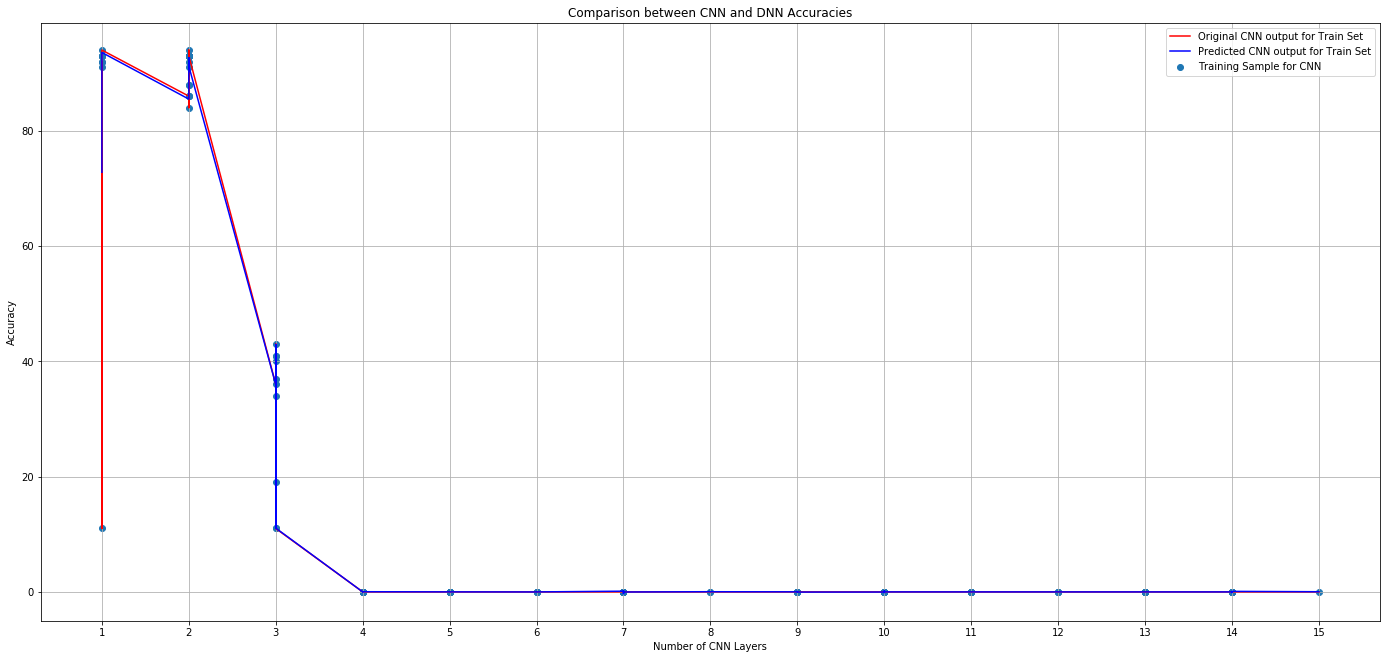

In [0]:
x = [[9, [1, 5, 8, 6, 5, 5, 8, 7, 10, 1, 25, 50, 10]], [8, [1, 9, 6, 7, 6, 7, 8, 8, 1, 25, 50, 10]], [8, [1, 7, 5, 8, 10, 6, 5, 8, 1, 25, 50, 10]], [4, [1, 8, 7, 7, 1, 25, 50, 10]], [7, [1, 7, 10, 9, 6, 8, 7, 1, 25, 50, 10]], [10, [1, 5, 9, 6, 5, 8, 7, 10, 7, 8, 1, 25, 50, 10]], [9, [1, 7, 5, 7, 7, 10, 8, 8, 9, 1, 25, 50, 10]], [6, [1, 8, 8, 9, 6, 5, 1, 25, 50, 10]], [7, [1, 6, 10, 9, 7, 5, 8, 1, 25, 50, 10]], [3, [1, 6, 7, 1, 1, 40, 10]], [5, [1, 9, 6, 8, 7, 1, 25, 50, 10]], [2, [1, 9, 1, 25, 50, 10]], [3, [1, 7, 7, 1, 1, 39, 10]], [2, [1, 5, 1, 25, 50, 10]], [1, [1, 9, 1, 25, 50, 10]], [1, [1, 8, 1, 25, 50, 10]], [4, [1, 7, 9, 8, 1, 25, 50, 10]], [2, [1, 8, 1, 25, 50, 10]],[3, [1, 7, 8, 1, 1, 11, 10]], [2, [1, 7, 1, 25, 50, 10]], [1, [1, 6, 1, 25, 50, 10]], [2, [1, 9, 1, 25, 50, 10]], [1, [1, 5, 1, 25, 50, 10]], [4, [1, 7, 10, 5, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [5, [1, 7, 9, 5, 6, 1, 25, 50, 10]], [1, [1, 10, 1, 25, 50, 10]],[5, [1, 5, 9, 5, 6, 1, 25, 50, 10]], [10, [1, 7, 7, 9, 6, 6, 10, 6, 6, 10, 1, 25, 50, 10]], [7, [1, 8, 10, 7, 7, 9, 7, 1, 25, 50, 10]], [10, [1, 9, 8, 5, 8, 6, 10, 7, 8, 9, 1, 25, 50, 10]], [10, [1, 5, 8, 8, 5, 6, 9, 8, 9, 5, 1, 25, 50, 10]], [9, [1, 5, 8, 6, 8, 6, 10, 6, 8, 1, 25, 50, 10]], [7, [1, 5, 8, 6, 5, 10, 8, 1, 25, 50, 10]], [6, [1, 8, 5, 8, 6, 10, 1, 25, 50, 10]], [10, [1, 6, 7, 5, 10, 7, 8, 5, 8, 8, 1, 25, 50, 10]], [7, [1, 6, 6, 8, 8, 8, 8, 1, 25, 50, 10]], [7, [1, 5, 8, 10, 7, 6, 9, 1, 25, 50, 10]], [10, [1, 9, 8, 6, 8, 5, 6, 9, 9, 7, 1, 25, 50, 10]], [5, [1, 10, 5, 8, 7, 1, 25, 50, 10]], [9, [1, 8, 8, 9, 5, 7, 6, 10, 6, 1, 25, 50, 10]], [7, [1, 5, 9, 9, 6, 5, 6, 1, 25, 50, 10]], [6, [1, 8, 8, 5, 8, 8, 1, 25, 50, 10]], [6, [1, 6, 6, 7, 6, 5, 1, 25, 50, 10]], [10, [1, 5, 8, 7, 6, 8, 6, 7, 9, 5, 1, 25, 50, 10]], [10, [1, 9, 10, 10, 8, 8, 8, 6, 7, 10, 1, 25, 50, 10]],[5, [1, 6, 7, 8, 5, 1, 25, 50, 10]], [3, [1, 6, 7, 1, 1, 13, 10]], [4, [1, 9, 8, 10, 1, 25, 50, 10]], [5, [1, 5, 10, 9, 7, 1, 25, 50, 10]], [4, [1, 5, 7, 7, 1, 25, 50, 10]], [3, [1, 10, 6, 1, 1, 15, 10]], [2, [1, 10, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [3, [1, 6, 8, 1, 1, 24, 10]], [1, [1, 6, 1, 25, 50, 10]],[4, [1, 9, 8, 6, 1, 25, 50, 10]], [2, [1, 8, 1, 25, 50, 10]], [1, [1, 7, 1, 25, 50, 10]], [1, [1, 7, 1, 25, 50, 10]], [2, [1, 7, 1, 25, 50, 10]], [2, [1, 6, 1, 25, 50, 10]], [3, [1, 9, 10, 1, 1, 26, 10]], [1, [1, 6, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [3, [1, 7, 9, 1, 1, 20, 10]],[13, [1, 7, 9, 6, 10, 6, 9, 9, 10, 6, 5, 9, 5, 1, 25, 50, 10]], [13, [1, 9, 10, 8, 8, 7, 9, 8, 6, 10, 8, 9, 6, 1, 25, 50, 10]], [12, [1, 6, 10, 9, 8, 8, 5, 7, 10, 9, 7, 6, 1, 25, 50, 10]], [11, [1, 5, 9, 10, 7, 8, 8, 7, 5, 9, 10, 1, 25, 50, 10]], [10, [1, 5, 7, 6, 8, 5, 10, 5, 6, 9, 1, 25, 50, 10]], [11, [1, 9, 10, 6, 7, 7, 7, 6, 9, 8, 8, 1, 25, 50, 10]], [13, [1, 9, 10, 9, 7, 6, 6, 10, 10, 7, 8, 8, 9, 1, 25, 50, 10]], [14, [1, 5, 7, 7, 10, 8, 6, 7, 7, 9, 5, 7, 10, 5, 1, 25, 50, 10]], [13, [1, 9, 5, 7, 5, 10, 8, 10, 5, 10, 8, 9, 10, 1, 25, 50, 10]], [13, [1, 9, 6, 5, 7, 7, 5, 9, 5, 8, 10, 5, 7, 1, 25, 50, 10]],[9, [1, 8, 5, 7, 9, 10, 8, 9, 9, 1, 25, 50, 10]], [11, [1, 8, 8, 9, 10, 6, 6, 6, 10, 6, 5, 1, 25, 50, 10]], [5, [1, 6, 7, 8, 10, 1, 25, 50, 10]], [7, [1, 9, 6, 8, 6, 7, 9, 1, 25, 50, 10]], [7, [1, 7, 6, 6, 5, 10, 9, 1, 25, 50, 10]], [6, [1, 7, 9, 6, 10, 5, 1, 25, 50, 10]], [9, [1, 8, 9, 7, 7, 6, 8, 8, 9, 1, 25, 50, 10]], [7, [1, 5, 7, 7, 9, 6, 8, 1, 25, 50, 10]], [5, [1, 8, 5, 6, 6, 1, 25, 50, 10]], [5, [1, 8, 9, 5, 9, 1, 25, 50, 10]],[13, [1, 5, 7, 10, 6, 9, 5, 9, 5, 7, 9, 9, 7, 1, 25, 50, 10]], [13, [1, 6, 6, 5, 7, 7, 5, 8, 10, 10, 9, 10, 9, 1, 25, 50, 10]], [12, [1, 7, 10, 6, 9, 9, 9, 8, 8, 9, 6, 8, 1, 25, 50, 10]], [11, [1, 10, 8, 7, 6, 10, 9, 7, 6, 10, 7, 1, 25, 50, 10]], [13, [1, 9, 8, 10, 7, 5, 8, 7, 9, 10, 5, 8, 7, 1, 25, 50, 10]], [14, [1, 8, 5, 9, 6, 9, 5, 6, 7, 10, 10, 9, 8, 9, 1, 25, 50, 10]], [15, [1, 8, 6, 7, 8, 7, 8, 6, 5, 8, 7, 10, 8, 7, 5, 1, 25, 50, 10]], [11, [1, 8, 6, 7, 8, 5, 8, 9, 8, 6, 6, 1, 25, 50, 10]], [10, [1, 6, 5, 6, 6, 9, 5, 7, 6, 7, 1, 25, 50, 10]], [11, [1, 5, 5, 7, 9, 7, 8, 9, 10, 8, 10, 1, 25, 50, 10]],[14, [1, 6, 5, 9, 10, 6, 5, 9, 5, 8, 5, 10, 5, 8, 1, 25, 50, 10]], [12, [1, 10, 10, 6, 9, 7, 7, 10, 6, 7, 9, 7, 1, 25, 50, 10]], [13, [1, 9, 7, 10, 10, 6, 6, 7, 10, 8, 9, 6, 9, 1, 25, 50, 10]], [14, [1, 10, 8, 6, 7, 7, 7, 7, 8, 5, 10, 5, 5, 9, 1, 25, 50, 10]], [10, [1, 6, 6, 9, 7, 8, 10, 10, 7, 5, 1, 25, 50, 10]], [13, [1, 8, 9, 5, 6, 9, 5, 6, 8, 8, 8, 7, 8, 1, 25, 50, 10]], [13, [1, 7, 7, 9, 10, 6, 7, 6, 7, 9, 8, 9, 8, 1, 25, 50, 10]], [11, [1, 6, 7, 8, 9, 8, 9, 7, 10, 10, 6, 1, 25, 50, 10]], [10, [1, 7, 5, 5, 5, 7, 7, 8, 5, 6, 1, 25, 50, 10]], [13, [1, 9, 8, 9, 7, 8, 5, 7, 5, 5, 5, 10, 7, 1, 25, 50, 10]],[13, [1, 10, 6, 7, 5, 8, 5, 8, 9, 7, 5, 9, 6, 1, 25, 50, 10]], [14, [1, 10, 7, 8, 9, 10, 9, 6, 5, 9, 9, 9, 10, 9, 1, 25, 50, 10]], [14, [1, 7, 7, 10, 10, 6, 10, 8, 8, 10, 8, 10, 10, 7, 1, 25, 50, 10]], [10, [1, 9, 5, 10, 8, 9, 9, 6, 10, 5, 1, 25, 50, 10]], [14, [1, 7, 10, 10, 10, 7, 5, 9, 6, 10, 6, 7, 6, 7, 1, 25, 50, 10]], [12, [1, 6, 10, 9, 7, 9, 9, 10, 10, 10, 9, 7, 1, 25, 50, 10]], [10, [1, 5, 5, 8, 10, 7, 9, 7, 8, 9, 1, 25, 50, 10]], [10, [1, 7, 5, 9, 6, 7, 7, 8, 9, 5, 1, 25, 50, 10]], [13, [1, 6, 8, 9, 10, 6, 5, 5, 6, 10, 6, 9, 6, 1, 25, 50, 10]], [10, [1, 8, 9, 10, 7, 7, 8, 5, 9, 5, 1, 25, 50, 10]],[4, [1, 6, 6, 10, 1, 25, 50, 10]], [2, [1, 5, 1, 25, 50, 10]], [2, [1, 8, 1, 25, 50, 10]], [4, [1, 9, 9, 7, 1, 25, 50, 10]], [3, [1, 6, 10, 1, 1, 49, 10]], [4, [1, 10, 7, 7, 1, 25, 50, 10]], [4, [1, 9, 10, 6, 1, 25, 50, 10]], [4, [1, 9, 5, 7, 1, 25, 50, 10]], [4, [1, 8, 10, 7, 1, 25, 50, 10]], [4, [1, 7, 5, 10, 1, 25, 50, 10]], [4, [1, 8, 10, 10, 1, 25, 50, 10]], [5, [1, 9, 7, 7, 10, 1, 25, 50, 10]], [5, [1, 9, 6, 10, 6, 1, 25, 50, 10]], [4, [1, 5, 8, 9, 1, 25, 50, 10]], [2, [1, 10, 1, 25, 50, 10]], [5, [1, 9, 7, 6, 5, 1, 25, 50, 10]], [3, [1, 7, 10, 1, 1, 30, 10]], [2, [1, 5, 1, 25, 50, 10]], [2, [1, 6, 1, 25, 50, 10]], [2, [1, 6, 1, 25, 50, 10]]]

y= [[0], [0], [0], [0], [0], [0], [0], [0], [0], [37], [0], [94], [41], [92], [93], [93], [0], [93],[40], [93], [11], [93], [92], [0], [93], [0], [94],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [36], [0], [0], [0], [11], [91], [93], [43], [93],[0], [93], [93], [92], [93], [93], [41], [91], [93], [34],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[0], [88], [88], [0], [11], [0], [0], [0], [0], [0], [0], [0], [0], [0], [86], [0], [19], [86], [84], [86]]


x_test = [[7, [1, 9, 8, 8, 9, 9, 5, 1, 25, 50, 10]], [12, [1, 5, 5, 7, 6, 6, 7, 6, 6, 10, 7, 6, 1, 25, 50, 10]], [5, [1, 9, 6, 8, 10, 1, 25, 50, 10]], [11, [1, 10, 6, 10, 7, 10, 10, 6, 10, 6, 8, 1, 25, 50, 10]], [5, [1, 7, 10, 8, 6, 1, 25, 50, 10]],[5, [1, 10, 6, 9, 6, 1, 25, 50, 10]], [3, [1, 8, 9, 1, 1, 39, 10]], [5, [1, 5, 10, 5, 7, 1, 25, 50, 10]], [1, [1, 9, 1, 25, 50, 10]], [5, [1, 9, 7, 9, 9, 1, 25, 50, 10]],[14, [1, 10, 9, 9, 6, 6, 6, 6, 6, 8, 5, 6, 5, 6, 1, 25, 50, 10]], [12, [1, 9, 9, 9, 7, 5, 5, 6, 10, 6, 9, 9, 1, 25, 50, 10]], [12, [1, 7, 5, 6, 9, 8, 7, 10, 8, 5, 7, 6, 1, 25, 50, 10]], [14, [1, 5, 8, 7, 7, 10, 5, 6, 8, 6, 5, 9, 7, 5, 1, 25, 50, 10]], [12, [1, 10, 6, 5, 9, 5, 9, 5, 5, 6, 7, 8, 1, 25, 50, 10]], [11, [1, 10, 8, 5, 8, 8, 10, 6, 6, 5, 9, 1, 25, 50, 10]], [13, [1, 10, 5, 7, 7, 9, 10, 9, 6, 9, 5, 6, 10, 1, 25, 50, 10]], [13, [1, 6, 5, 7, 9, 8, 6, 5, 6, 7, 5, 6, 10, 1, 25, 50, 10]], [12, [1, 7, 9, 5, 8, 5, 6, 7, 10, 7, 9, 8, 1, 25, 50, 10]], [13, [1, 8, 8, 7, 9, 9, 10, 5, 9, 9, 8, 7, 5, 1, 25, 50, 10]],[3, [1, 8, 7, 1, 1, 20, 10]], [2, [1, 6, 1, 25, 50, 10]], [2, [1, 9, 1, 25, 50, 10]], [1, [1, 5, 1, 25, 50, 10]], [2, [1, 7, 1, 25, 50, 10]], [1, [1, 6, 1, 25, 50, 10]], [1, [1, 7, 1, 25, 50, 10]], [3, [1, 7, 9, 1, 1, 36, 10]], [5, [1, 8, 8, 5, 9, 1, 25, 50, 10]], [4, [1, 6, 10, 7, 1, 25, 50, 10]]]

y_test = [[0], [0], [0], [0], [0],[0], [19], [0], [88], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[38], [92], [93], [93], [93], [94], [94], [40], [0], [0]]


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, D_out, H = 64, 19 , 1 , 5

for i in range(len(x)):
  for j in range(D_in):
    if len(x[i][1])<D_in:
      x[i][1]+= [0 for _ in range(D_in-len(x[i][1]))]
for i in range(len(x)):      
      x[i] = list(flatten(x[i]))

x, y = zip(*sorted(zip(x, y)))
x=torch.FloatTensor(x)
y=torch.FloatTensor(y)

for i in range(len(x_test)):
  for j in range(D_in):
    if len(x_test[i][1])<D_in:
      x_test[i][1]+= [0 for _ in range(D_in-len(x_test[i][1]))]
for i in range(len(x_test)):      
      x_test[i] = list(flatten(x_test[i]))
x_test, y_test = zip(*sorted(zip(x_test, y_test)))
x_test=torch.FloatTensor(x_test)
y_test=torch.FloatTensor(y_test)



# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear((D_in+1), H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)


loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(19000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
#     print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
# print("Final Loss",loss.item())
# x_test=x
# y_test=y
Y_pred=model(x)

layers=[int(x[i][0]) for i in range(len(x))]

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24,11))
plt.scatter(layers, y.numpy())
plt.plot(layers, y.numpy(), 'r',label='Original CNN output for Train Set')
plt.plot(layers, Y_pred.detach().numpy(), 'b',label='Predicted CNN output for Train Set')
plt.xlabel('Number of CNN Layers')
plt.ylabel('Accuracy')
plt.title("Comparison between CNN and DNN Accuracies")
plt.xticks(np.arange(min(layers), max(layers)+1, 1.0))
plt.gca().legend(('Original CNN output for Train Set','Predicted CNN output for Train Set','Training Sample for CNN'))
plt.gca().grid()
plt.show()

Trying to linearize and plot

In [0]:
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num)
    return final_list 

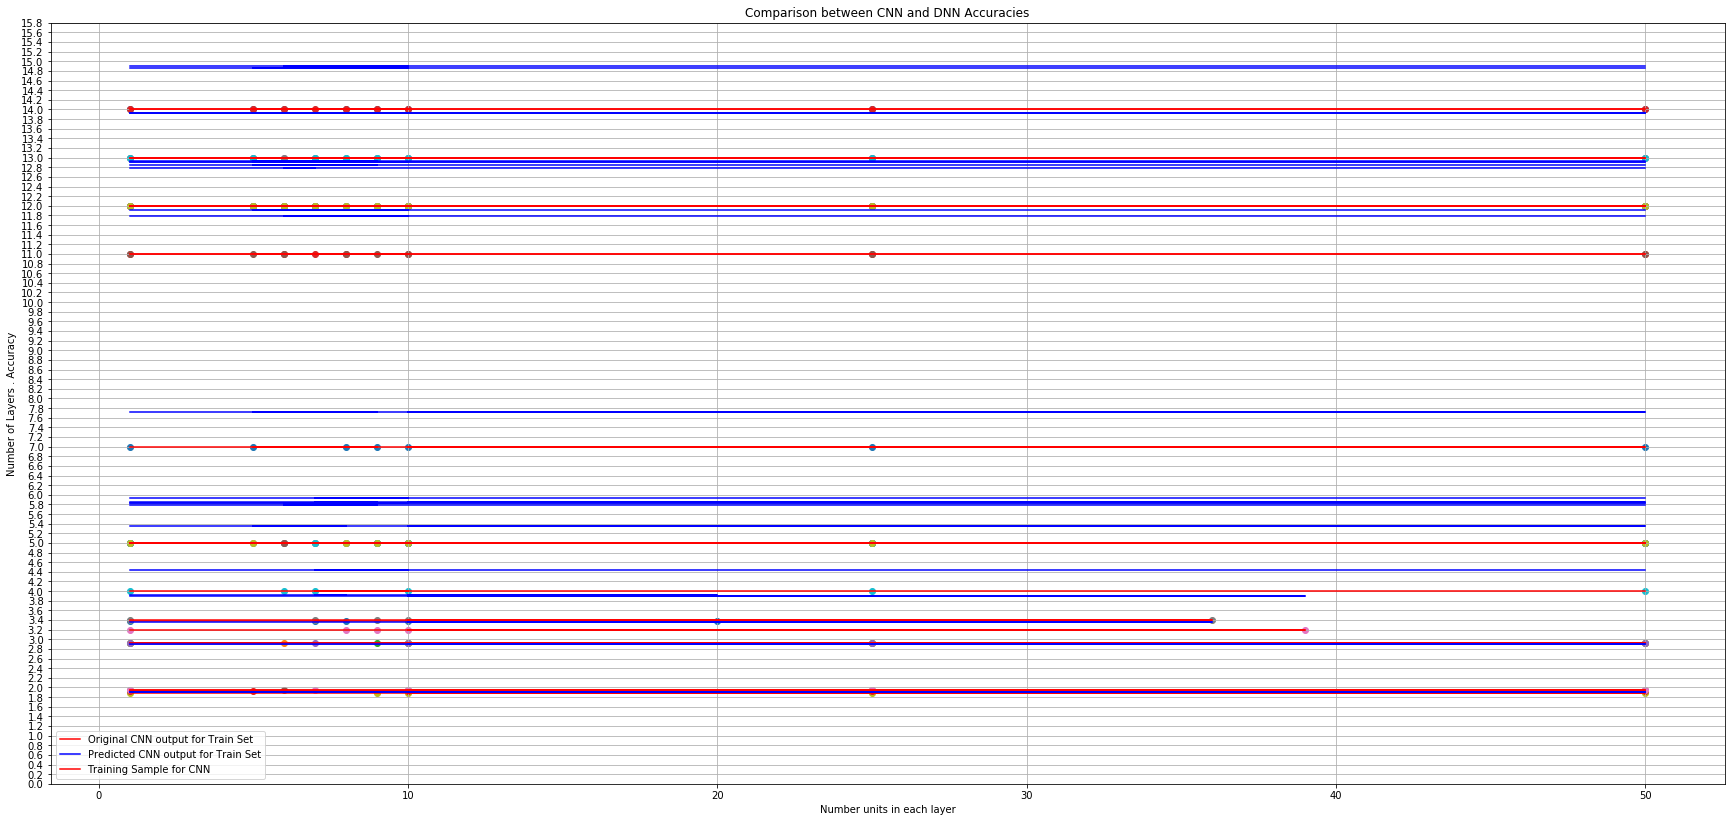

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x_test = [[7, [1, 9, 8, 8, 9, 9, 5, 1, 25, 50, 10]], [12, [1, 5, 5, 7, 6, 6, 7, 6, 6, 10, 7, 6, 1, 25, 50, 10]], [5, [1, 9, 6, 8, 10, 1, 25, 50, 10]], [11, [1, 10, 6, 10, 7, 10, 10, 6, 10, 6, 8, 1, 25, 50, 10]], [5, [1, 7, 10, 8, 6, 1, 25, 50, 10]],[5, [1, 10, 6, 9, 6, 1, 25, 50, 10]], [3, [1, 8, 9, 1, 1, 39, 10]], [5, [1, 5, 10, 5, 7, 1, 25, 50, 10]], [1, [1, 9, 1, 25, 50, 10]], [5, [1, 9, 7, 9, 9, 1, 25, 50, 10]],[14, [1, 10, 9, 9, 6, 6, 6, 6, 6, 8, 5, 6, 5, 6, 1, 25, 50, 10]], [12, [1, 9, 9, 9, 7, 5, 5, 6, 10, 6, 9, 9, 1, 25, 50, 10]], [12, [1, 7, 5, 6, 9, 8, 7, 10, 8, 5, 7, 6, 1, 25, 50, 10]], [14, [1, 5, 8, 7, 7, 10, 5, 6, 8, 6, 5, 9, 7, 5, 1, 25, 50, 10]], [12, [1, 10, 6, 5, 9, 5, 9, 5, 5, 6, 7, 8, 1, 25, 50, 10]], [11, [1, 10, 8, 5, 8, 8, 10, 6, 6, 5, 9, 1, 25, 50, 10]], [13, [1, 10, 5, 7, 7, 9, 10, 9, 6, 9, 5, 6, 10, 1, 25, 50, 10]], [13, [1, 6, 5, 7, 9, 8, 6, 5, 6, 7, 5, 6, 10, 1, 25, 50, 10]], [12, [1, 7, 9, 5, 8, 5, 6, 7, 10, 7, 9, 8, 1, 25, 50, 10]], [13, [1, 8, 8, 7, 9, 9, 10, 5, 9, 9, 8, 7, 5, 1, 25, 50, 10]],[3, [1, 8, 7, 1, 1, 20, 10]], [2, [1, 6, 1, 25, 50, 10]], [2, [1, 9, 1, 25, 50, 10]], [1, [1, 5, 1, 25, 50, 10]], [2, [1, 7, 1, 25, 50, 10]], [1, [1, 6, 1, 25, 50, 10]], [1, [1, 7, 1, 25, 50, 10]], [3, [1, 7, 9, 1, 1, 36, 10]], [5, [1, 8, 8, 5, 9, 1, 25, 50, 10]], [4, [1, 6, 10, 7, 1, 25, 50, 10]]]

y_test = [[0], [0], [0], [0], [0],[0], [19], [0], [88], [0],[0], [0], [0], [0], [0], [0], [0], [0], [0], [0],[38], [92], [93], [93], [93], [94], [94], [40], [0], [0]]

layers=[]
layer_value=[]
for lis in x_test:
  layers.append(lis[0])
  layer_value.append(Remove(lis[1]))

y=[]
y_predict=[]
# print(layers)
# print(layer_value)
for i in range(len(layers)):
  y.append(layers[i]+float(y_test[i][0]/100))
  y_predict.append(layers[i]+float(Y_pred[i][0]/100))
# print(y_predict)
# print(layer_value[1])

x=list(range(0, 60))
fig = plt.figure(figsize=(30,14))
for i in range(len(layer_value)):
  yplot=[y[i]]*len(layer_value[i])
  y_pred_plot=[y_predict[i]]*len(layer_value[i])
  # print(yplot)
  plt.scatter(layer_value[i],yplot)
  plt.plot(layer_value[i],yplot,'r',label='Original CNN output for Train Set')
  plt.plot(layer_value[i],y_pred_plot,'b',label='Predicted CNN output for Train Set')
# plt.scatter(layers, y.numpy())
# plt.plot(layers, y.numpy(), 'r',label='Original CNN output for Train Set')
# plt.plot(layers, Y_pred.detach().numpy(), 'b',label='Predicted CNN output for Train Set')
plt.xlabel('Number units in each layer')
plt.ylabel('Number of Layers . Accuracy')
plt.title("Comparison between CNN and DNN Accuracies")
# plt.xticks(np.arange(min(layers), max(layers)+1, 1.0))
plt.yticks(np.arange(0, 16, 0.2))
plt.gca().legend(('Original CNN output for Train Set','Predicted CNN output for Train Set','Training Sample for CNN'))
plt.gca().grid()
plt.show()

Implementing Dimensional Reduction to plot for X-Axis

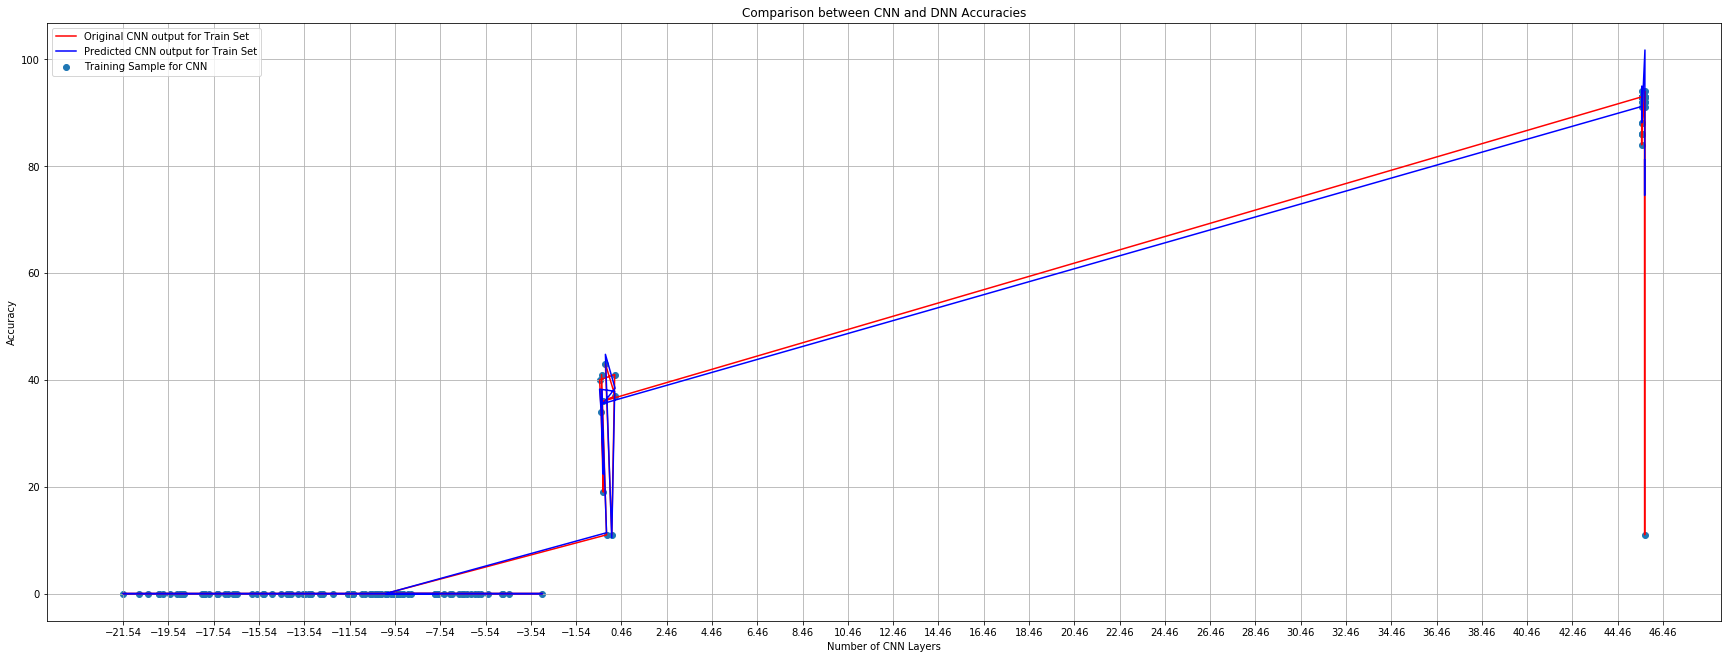

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
reduced = pca.fit_transform(x)
# print(reduced)

layers=list(flatten(reduced))
# print(layers)

# import matplotlib.pyplot as plt
# import numpy as np
# fig = plt.figure(figsize=(30,11))
# plt.scatter(layers, y_test.numpy())
# plt.plot(layers, y_test.numpy(), 'r',label='Original CNN output for Test Set')
# plt.plot(layers, Y_pred.detach().numpy(), 'b',label='Predicted CNN output for Test Set')
# plt.xlabel('Number of CNN Layers')
# plt.ylabel('Accuracy')
# plt.title("Comparison between CNN and DNN Accuracies")
# plt.xticks(np.arange(min(layers), max(layers)+1, 2.0))
# plt.gca().legend(('Original CNN output for Test Set','Predicted CNN output for Test Set','Training Sample for CNN'))
# plt.gca().grid()
# plt.show()

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,11))
plt.scatter(layers, y.numpy())
plt.plot(layers, y.numpy(), 'r',label='Original CNN output for Train Set')
plt.plot(layers, Y_pred.detach().numpy(), 'b',label='Predicted CNN output for Train Set')
plt.xlabel('Number of CNN Layers')
plt.ylabel('Accuracy')
plt.title("Comparison between CNN and DNN Accuracies")
plt.xticks(np.arange(min(layers), max(layers)+1, 2.0))
plt.gca().legend(('Original CNN output for Train Set','Predicted CNN output for Train Set','Training Sample for CNN'))
plt.gca().grid()
plt.show()

Predict the input/Number of layers

In [0]:
# x1 = torch.FloatTensor([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31],[32],[33],[34],[35],[36],[37],[38],[39],[40],[41],[42],[43],[44],[45],[46],[47],[48],[49],[50]])
# y1 = torch.FloatTensor([[96],[96],[94],[96],[95],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11]]) 

# x2 = torch.FloatTensor([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
# y2 = torch.FloatTensor([[96], [96], [94], [96], [96], [11],[11],[11],[11],[11]])

# x3 = torch.FloatTensor([[43], [14], [17], [2], [32], [6], [34], [1], [25], [10]])
# y3 = torch.FloatTensor( [[11], [11], [11], [96], [11], [96], [11], [96], [11], [11]])

# x_list=[x1,x2,x3]
# y_list=[y1,y2,y3]


# Create Tensors to hold inputs and outputs
# x = torch.randn(N, D_in)
# y = torch.randn(N, D_out)


# class DNN(nn.Module):
#     def __init__(self,D_in,D_out,H):
#         super(DNN, self).__init__()
#         self.fc1 = nn.Linear(D_in, H)
#         self.fc3 = nn.Linear(D_in, H)
#         self.fc2 = nn.Linear(H,D_out)

#     def forward(self, x):
#         print(x.size())
#         x = F.relu(self.fc1(x))
#         print(x.size())
#         x = F.relu(self.fc3(x))
#         print(x.size())
#         x = self.fc2(x)
#         print(x.size())
#         return x
# model=DNN(1,1,5)

# x_test = torch.FloatTensor([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31],[32],[33],[34],[35],[36],[37],[38],[39],[40],[41],[42],[43],[44],[45],[46],[47],[48],[49],[50]])
# y_test = torch.FloatTensor([[96],[96],[94],[96],[95],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11],[11]]) 


In [0]:
import numpy as np
import scipy.optimize

# our forward model, paired layers of already-trained
# weights and biases.
# weights = [np.array(model.fc1.weight.data) np.array(model.fc2.weight.data)]
parameters=list(model.parameters())
# weights = [np.array(parameters[0].detach()), np.array(parameters[2].detach())]
# biases = [np.array(parameters[1].detach()), np.array(parameters[3].detach())]

weights = [parameters[0].data.numpy(), parameters[2].data.numpy()]
biases = [parameters[1].data.numpy(), parameters[3].data.numpy()]

def f(x):
    for W, b in zip(weights, biases):
        # relu activation.
        x = np.clip(np.dot(W, x) + b, 0, np.inf)
    return x

zstar = 100
# the loss we want to optimize: minimize difference
# between zstar and f(x).
def loss(x):
    return abs(f(x) - zstar)

x0 = 0
result = scipy.optimize.minimize(loss, x0)
print(result)
print('Optimum number of layers: ',round(result['x'][0]))

      fun: 2.7430132831796072e-08
 hess_inv: array([[0.0790673]])
      jac: array([11.46178246])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 321
      nit: 1
     njev: 103
   status: 2
  success: False
        x: array([2.10359925])
Optimum number of layers:  2.0


In [0]:
import matplotlib.pyplot as plt


In [0]:
# import numpy as np
# w=np.array(model.fc2.weight.data)
# w

array([[-5.7409334,  0.3857801,  5.1259446,  4.442956 ,  4.039679 ]],
      dtype=float32)

In [0]:
# fig = plt.figure()
# plt.plot(train_counter, train_losses, color='blue')
# plt.scatter(test_counter, test_losses, color='red')
# plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
# plt.xlabel('number of training examples seen')
# plt.ylabel('negative log likelihood loss')
# fig

In [0]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
#         self.conv2 = nn.Conv2d(10, 10, kernel_size=3)
#         self.conv3 = nn.Conv2d(10, 10, kernel_size=3)
#         self.conv4 = nn.Conv2d(10, 20, kernel_size=3)
# #         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(320, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         print(x.shape)
#         x = F.relu(F.max_pool2d(self.conv1(x), 1))
#         print(x.shape)
# #         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = F.relu(F.max_pool2d(self.conv2(x), 1))
#         print(x.shape)
    
#         x = F.relu(F.max_pool2d(self.conv3(x), 1))
#         print(x.shape)
        
#         x = F.relu(F.max_pool2d(self.conv4(x), 1))
#         print(x.shape)
#         x = x.view(-1, 320)
#         x = F.relu(self.fc1(x))
# #         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return F.log_softmax(x)

Crude Example to dynamically change number of layers


In [0]:
# from torch import nn
# from collections import OrderedDict

# class Net(nn.Module):
    
#     def __init__(self, n_layers):
        
#         super().__init__()
        
#         layers = OrderedDict()
#         for i in range(n_layers):
#             layers[str(i)] = nn.Linear(5,5)
            
#         self.layers = nn.Sequential(layers)
#         print(self)
        
# Net(n_layers=3)

https://pytorch.org/docs/stable/nn.html#torch.nn.ModuleList

In [0]:
# g_accuracy=[]
# def test(model,g_accuracy):
#   model.eval()
#   test_loss = 0
#   correct = 0
#   with torch.no_grad():
#     for data, target in test_loader:
#       output = model(data)
# #       print(output)
      
#       if len(output.size())==1:
#         accuracy=0
        
#       else:
#         test_loss += F.nll_loss(output, target, size_average=False).item()
#         pred = output.data.max(1, keepdim=True)[1]
#         correct += pred.eq(target.data.view_as(pred)).sum()
#     test_loss /= len(test_loader.dataset)
#     test_losses.append(test_loss)
#     accuracy= 100. * correct / len(test_loader.dataset)
# #   print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
# #     test_loss, correct, len(test_loader.dataset),
# #     100. * correct / len(test_loader.dataset)))
#   return accuracy

In [0]:
accuracy=test()
print("Accuracy before Training:",accuracy)
for epoch in range(1, n_epochs + 1):
  train(epoch)
  accuracy=test()
  print("Accuracy after Training:",accuracy)

All together with for loops


In [0]:
import random
n_epochs = 3
x=[]
y=[]
layer=range(26,51)
for i in range(len(layer)):
#   print('Iteration',i+1)
#   layers=random.randint(2,51)
  layers=layer[i]
#   print('Iteration',i+1)
  print('Layers',layers)
  x.append([layers])
  model1 = CNNtry(layers)
  optimizer = optim.SGD(model1.parameters(), lr=learning_rate,momentum=momentum)
#   accuracy=test()
#   print("Accuracy before Training:",accuracy)
  for epoch in range(1, n_epochs + 1):
    print('Epoch:',epoch)
    train(epoch)
  accuracy=test()
  print("Accuracy after Training:",accuracy)
  y.append([accuracy])
print('layers:',x)
print("Accuracy:",y)


Layers 1
Accuracy after Training: tensor(96)
Layers 2
Accuracy after Training: tensor(96)
Layers 3
Accuracy after Training: tensor(94)
Layers 4
Accuracy after Training: tensor(96)
Layers 5
Accuracy after Training: tensor(95)
Layers 6
Accuracy after Training: tensor(11)
Layers 7
Accuracy after Training: tensor(11)
Layers 8
Accuracy after Training: tensor(11)
Layers 9
Accuracy after Training: tensor(11)
Layers 10
Accuracy after Training: tensor(11)
Layers 11
Accuracy after Training: tensor(11)
Layers 12
Accuracy after Training: tensor(11)
Layers 13
Accuracy after Training: tensor(11)
Layers 14
Accuracy after Training: tensor(11)
Layers 15
Accuracy after Training: tensor(11)
Layers 16
Accuracy after Training: tensor(11)
Layers 17
Accuracy after Training: tensor(11)
Layers 18
Accuracy after Training: tensor(11)
Layers 19
Accuracy after Training: tensor(11)
Layers 20
Accuracy after Training: tensor(11)
Layers 21
Accuracy after Training: tensor(11)
Layers 22
Accuracy after Training: tensor(11)
Layers 23
Accuracy after Training: tensor(11)
Layers 24
Accuracy after Training: tensor(11)
Layers 25
Accuracy after Training: tensor(11)

Number of epochs:3

> Indented block

> Indented block




layers: [[43], [14], [17], [34], [32], [6], [34], [12], [25], [13]]
Accuracy: [[11], [11], [11], [11], [11], [96], [11], [11], [11], [11]]

layers: [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
Accuracy: [[96], [96], [94], [96], [11], [96], [11], [11], [11], [11]]